##  Challenge 2 – Moving Averages
 
In this challenge, we visualize the price action of our top 5 selected stocks, overlaying their **50-day** and **200-day** moving averages.

These moving averages help smooth out price fluctuations and reveal long-term trends. The 50-day MA shows the short-to-medium trend, while the 200-day MA reveals longer-term momentum.

Stocks trading above both MAs are generally considered to be in a **strong uptrend**.


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

##  Download Stock Data
We begin by pulling price data for our 5 selected stocks using Yahoo Finance.

In [3]:
tickers = ['AAPL', 'HD', 'V', 'LMT', 'NEE']

stocks = yf.download(tickers)


C:\Users\alexm\AppData\Local\Temp\ipykernel_32736\2278494884.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stocks = yf.download(tickers)
[*********************100%***********************]  5 of 5 completed


## Extract Close Prices

Focus on the `Close` prices, which are commonly used for calculating moving averages.

In [12]:
close = stocks.loc[:,'Close'].copy().dropna()
close

Ticker,AAPL,HD,LMT,NEE,V
Date,,,,,
2008-03-19,3.897126,17.370302,59.418381,9.120477,12.514244
2008-03-20,4.005321,18.159861,59.029003,9.129476,14.252948
2008-03-24,4.193460,18.936476,59.459698,9.360452,13.229662
2008-03-25,4.237039,18.612885,60.179451,9.388944,14.009310
2008-03-26,4.359660,18.224579,59.725170,9.402445,14.166567
...,...,...,...,...,...
2025-06-18,196.580002,347.029999,468.600006,71.570000,340.380005
2025-06-20,201.000000,349.619995,470.559998,71.529999,338.570007
2025-06-23,201.500000,356.959991,472.459991,70.730003,343.750000


## Calculate the 50-Day Simple Moving Average
This captures short-to-medium term price trends.

In [17]:
# Create a new DataFrame to store the 50-day SMA for each stock
sma50 = pd.DataFrame(index=close.index)

# Calculate SMA50 for each stock column
for ticker in close.columns:
    sma50[ticker] = close[ticker].rolling(window=50, min_periods=50).mean()



## Calculate the 200-Day Simple Moving Average

This smooths out price movement over a longer horizon to identify major trend directions.

In [20]:
# Create a new DataFrame to store the 200-day SMA for each stock
sma200 = pd.DataFrame(index=close.index)

# Calculate SMA200 for each stock
for ticker in close.columns:
    sma200[ticker] = close[ticker].rolling(window=200, min_periods=200).mean()



## Plot Price with Moving Averages
 
For each stock, we overlay the Close price with its 50-day and 200-day SMAs.

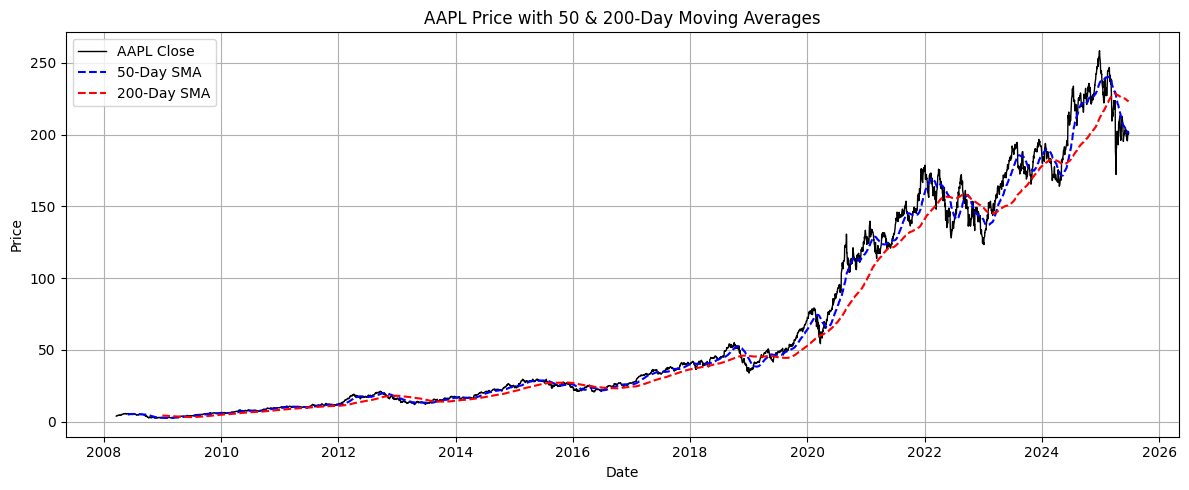

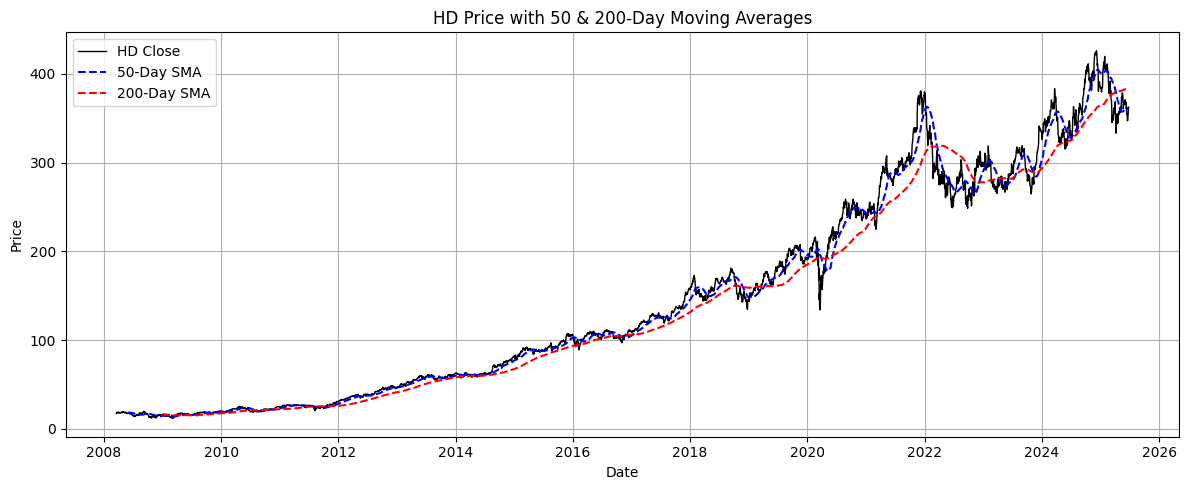

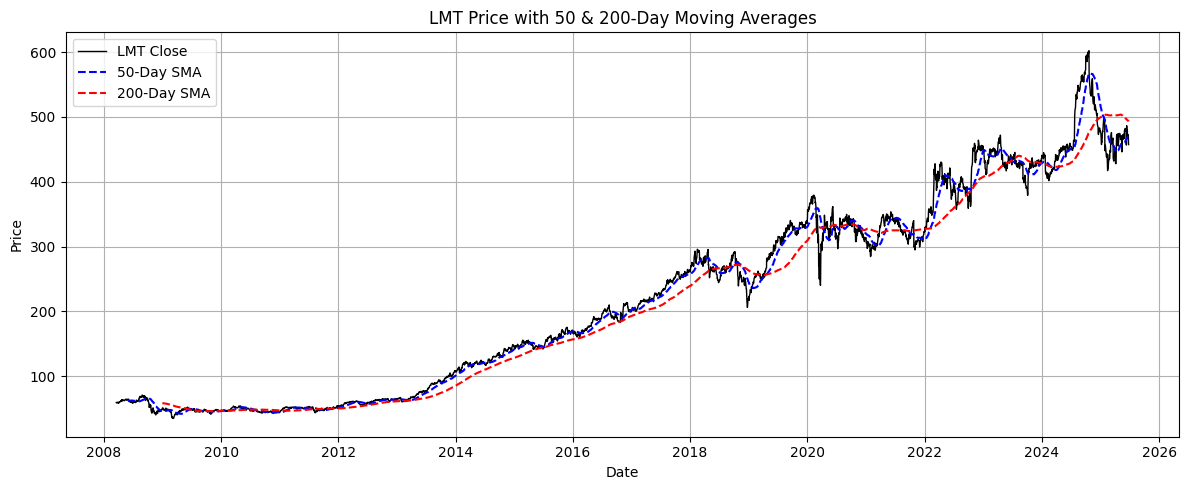

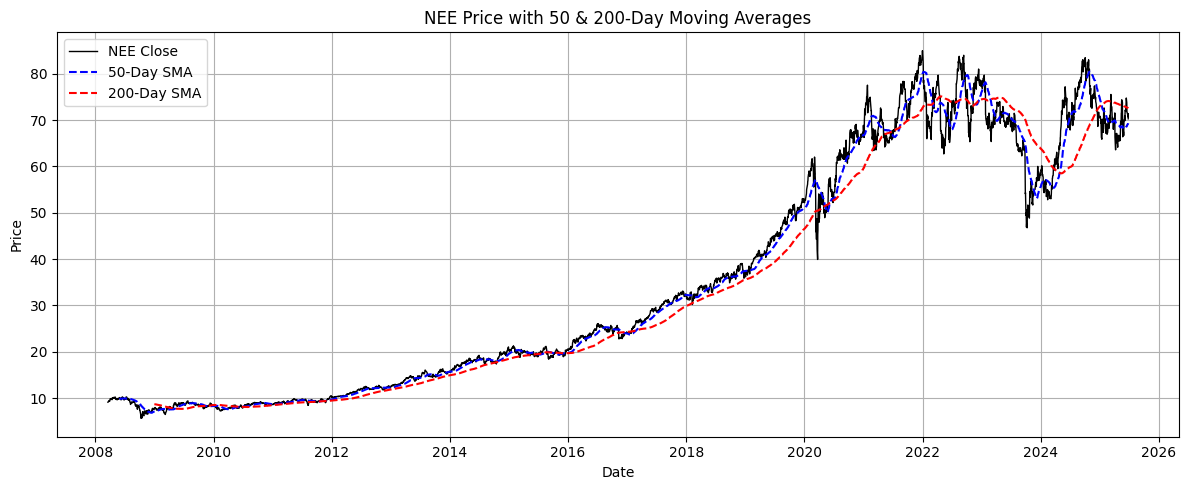

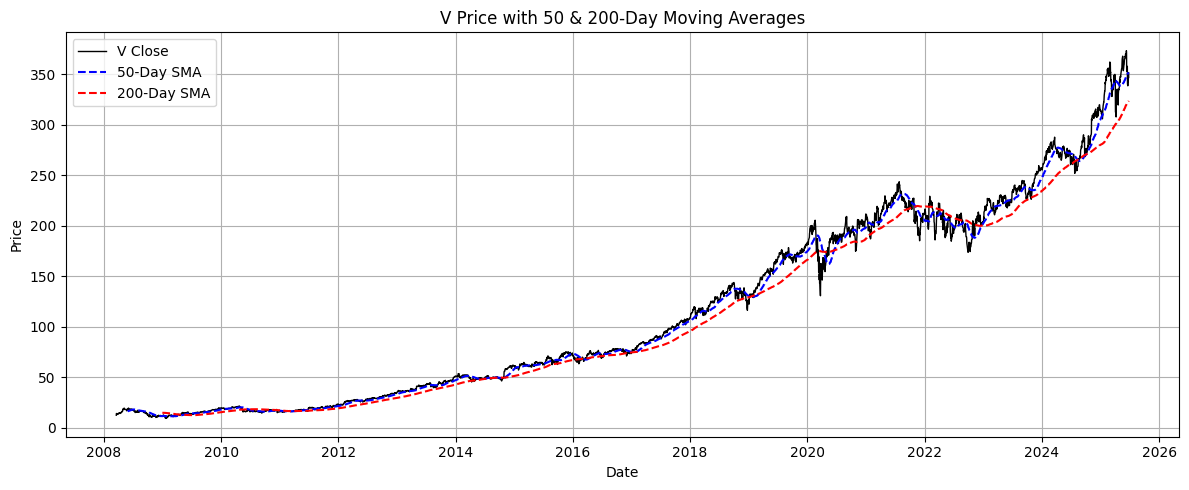

In [21]:
import matplotlib.pyplot as plt

tickers = ['AAPL', 'HD', 'LMT', 'NEE', 'V']

for ticker in tickers:
    plt.figure(figsize=(12, 5))
    plt.plot(close[ticker], label=f'{ticker} Close', color='black', linewidth=1)
    plt.plot(sma50[ticker], label='50-Day SMA', color='blue', linestyle='--')
    plt.plot(sma200[ticker], label='200-Day SMA', color='red', linestyle='--')
    
    plt.title(f'{ticker} Price with 50 & 200-Day Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
